In [1]:
import pandas as pd
from eodhd import APIClient
import sys
sys.path.insert(0, "../src/")
from Features import fundamental_features_new, fundamental_features, technical_features
import talib
import warnings
warnings.filterwarnings("ignore", category=pd.errors.PerformanceWarning)

In [2]:
import os
# importing necessary functions from dotenv library
from dotenv import load_dotenv, dotenv_values 

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

In [179]:
load_dotenv() 

# accessing and printing value
api_key=os.getenv("FACTOR_RESEARCH_EOD_HD_API_KEY")

# client=APIClient(api_key)
# ticker="JPM"
# data=client.get_fundamentals_data(f"{ticker}.US")

In [34]:
def clean_technical_features(df):
    # drop columns with more than 50% na values
    df = df.drop(columns = df.columns[df.isna().sum()>len(df)/2])

    # drop columns with object type
    df = df.drop(columns = df.select_dtypes(include=['object']).columns)

    # fill na values with previous values
    nacolumns = df.columns[df.isna().sum()>0]
    df[nacolumns]  = df[nacolumns].ffill()

    # drop rows with na values
    df.dropna(inplace=True)
    return df

In [4]:
def getWeights(df,threshold=0.75):
    # drop columns with more than 50% na values
    df = df.drop(columns = df.columns[df.isna().sum()>len(df)/2])

    # drop columns with object type
    df = df.drop(columns = df.select_dtypes(include=['object']).columns)

    # fill na values with previous values
    nacolumns = df.columns[df.isna().sum()>0]
    df[nacolumns]  = df[nacolumns].ffill()

    # drop rows with na values
    df.dropna(inplace=True)

    #pca weights , weighted average of loadings with weights as explained variance
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df)
    pca = PCA()
    pca.fit(scaled_data)

    first_index_above_threshold = np.argmax(pca.explained_variance_ratio_.cumsum() > threshold)
    loadings = abs(pca.components_)
    loadings = loadings/(loadings.sum(axis=1)[:, np.newaxis])
    fa = (loadings[:first_index_above_threshold] * pca.explained_variance_ratio_[:first_index_above_threshold][:, np.newaxis]).sum(axis=0)/sum(pca.explained_variance_ratio_[:first_index_above_threshold])
    return fa, df.columns
    
    

    

In [5]:
file_path = '/Users/jandh/Desktop/Old Desktop/od/2 Quarter/Flexible/snp1500.txt'
snp1500 = pd.DataFrame(index = pd.read_csv(file_path, header=None).squeeze())
snp1500.index.name = 'ticker'
snp1500


""
ticker
BKNG
MMM
AOS
ATEN
AAON
...
ELF
EBAY
PLUS


# PCA for technical factors only

In [6]:
pca_tec = pd.DataFrame(index = snp1500.index)
for i in range(len(pca_tec)):
    try:
        tech = technical_features.BuildFeatures(pca_tec.index[i])
        tech.build_technical_features()
        df = tech.technical_features
        weights,cols = getWeights(df)
        pca_tec.loc[pca_tec.index[i],cols] = weights
        print(pca_tec.index[i],'Success')
        # break
    except:
        print(f"Issue in {pca_tec.index[i]}")
        continue



Error: Moving_Average_Convergence/Divergence_Fix_12/26
BKNG Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
MMM Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
AOS Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
ATEN Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
AAON Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
AIR Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
ABM Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
ACAD Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
ACIW Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
ADMA Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
ACM Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
AGCO Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
ALE Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
AMSF Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26

$BRK.B: possibly delisted; no timezone found


Error: Moving_Average_Convergence/Divergence_Fix_12/26
Issue in BRK.B
Error: Moving_Average_Convergence/Divergence_Fix_12/26
BHLB Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
BERY Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
BBY Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
BIO Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
TECH Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
BLFS Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
BMRN Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
BIIB Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
BKH Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
BL Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
BLK Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
BLKB Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
BX Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26

$BF.B: possibly delisted; no price data found  (1d 1926-03-10 -> 2025-02-13)


Error: Moving_Average_Convergence/Divergence_Fix_12/26
BRO Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
Issue in BF.B
Error: Moving_Average_Convergence/Divergence_Fix_12/26
BRKR Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
BC Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
BLDR Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
BG Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
BURL Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
CHRW Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
CACI Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
CBRE Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
CDW Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
CEVA Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
CF Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
CME Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
C

$CWEN.A: possibly delisted; no timezone found


Error: Moving_Average_Convergence/Divergence_Fix_12/26
Issue in CWEN.A
Error: Moving_Average_Convergence/Divergence_Fix_12/26
CWEN Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
CLF Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
CSGP Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
COKE Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
CCOI Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
CGNX Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
CTSH Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
CNS Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
COHR Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
COHU Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
CL Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
COLL Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
COLB Success
Error: Moving_Average_Convergence/Divergence_Fix_

$MOG.A: possibly delisted; no timezone found


Error: Moving_Average_Convergence/Divergence_Fix_12/26
Issue in MOG.A
Error: Moving_Average_Convergence/Divergence_Fix_12/26
MS Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
MORN Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
MSI Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
COOP Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
MLI Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
MUR Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
MUSA Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
MYGN Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
NABL Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
NBTB Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
NATL Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
VYX Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
NKE Success
Error: Moving_Average_Convergence/Divergence_Fix_12/2

Could not get exchangeTimezoneName for ticker 'SITC' reason: 'chart'
$SITC: possibly delisted; no timezone found


Error: Moving_Average_Convergence/Divergence_Fix_12/26
Issue in SITC
Error: Moving_Average_Convergence/Divergence_Fix_12/26
SJW Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
SLG Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
SLM Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
SM Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
SPSC Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
SPXC Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
STAA Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
STAG Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
STE Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
SBRA Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
SABR Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
SAFE Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
SAFT Success
Error: Moving_Average_Convergence/Divergence_Fix_12/2

In [18]:
pca_tec.describe()

,SMA_50,SMA_200,Chaikin_ADI_Line,Chaikin_ADI_Oscillator,ADM_Index,ADM_Index_Rating,Absolute_Price_Oscillator,Average_True_Range,Average_Price,Bollinger_Band_Upper,...,Plus_Directional_Movement,Percentage_Price_Oscillator,Median_Price,Money_Flow_Index,MidPoint_over_period,Midpoint_Price_over_period,Lowest_value_over_period,Index_of_lowest_value_over_period,Highest_value_over_period,Index_of_highest_value_over_period
count,1499.00000000,1488.00000000,1501.00000000,1501.00000000,1500.00000000,1499.00000000,1500.00000000,1500.00000000,1501.00000000,1500.00000000,...,1501.00000000,1500.00000000,1501.00000000,1501.00000000,1501.00000000,1501.00000000,1501.00000000,1501.00000000,1501.00000000,1501.00000000
mean,0.01132802,0.01171337,0.01116099,0.00866864,0.00865898,0.00873706,0.01080157,0.01249927,0.01090891,0.01076440,...,0.01312214,0.00995941,0.01091482,0.00853648,0.01079637,0.01079864,0.01100350,0.01187337,0.01074820,0.01186151
std,0.00078804,0.00091096,0.00120365,0.00105918,0.00122338,0.00112118,0.00080378,0.00088203,0.00073230,0.00039241,...,0.00103038,0.00080712,0.00073212,0.00078870,0.00063950,0.00063718,0.00067238,0.00110763,0.00063833,0.00110142
min,0.00837098,0.01031102,0.00636469,0.00516183,0.00616452,0.00597328,0.00889494,0.00756836,0.00944293,0.00959216,...,0.00827166,0.00359851,0.00943596,0.00653798,0.00995285,0.00996866,0.01005061,0.00634056,0.01001063,0.00631196
25%,0.01095317,0.01115355,0.01058400,0.00797609,0.00778565,0.00795714,0.01021124,0.01201262,0.01056109,0.01051947,...,0.01266434,0.00943598,0.01056695,0.00808892,0.01061357,0.01061376,0.01076433,0.01145469,0.01056249,0.01143053
50%,0.01120289,0.01151107,0.01130424,0.00859953,0.00851913,0.00865398,0.01068725,0.01253536,0.01087182,0.01072439,...,0.01324847,0.00981426,0.01088193,0.00844709,0.01076031,0.01076516,0.01094017,0.01206635,0.01071816,0.01205371
75%,0.01156814,0.01214883,0.01191199,0.00933481,0.00938369,0.00939710,0.01134360,0.01308606,0.01119977,0.01097672,...,0.01370155,0.01029418,0.01120647,0.00886467,0.01092622,0.01092676,0.01115776,0.01247553,0.01085520,0.01246404
max,0.03295843,0.03288083,0.02848275,0.01779377,0.01580452,0.01377044,0.01375629,0.01491206,0.03238550,0.01368167,...,0.03441394,0.01404245,0.03238663,0.02298391,0.03270619,0.03272182,0.03273290,0.02874026,0.03266999,0.02870829


In [11]:
pca_weights = pd.DataFrame(pca_tec.median(axis=0).sort_values(ascending=False),columns=['median weights'])
pca_weights

,median weights
Minus_Directional_Movement,0.01380337
Plus_Directional_Movement,0.01324847
Average_True_Range,0.01253536
Index_of_lowest_value_over_period,0.01206635
Index_of_highest_value_over_period,0.01205371
...,...
Identical_Three_Crows,0.00163566
Rising_Falling_Three_Methods,0.00162684
Kicking,0.00000000
Kicking_by_Length,0.00000000


(array([ 3.,  0.,  0.,  2.,  1.,  0.,  4.,  2.,  3.,  1.,  4.,  4.,  6.,
         7.,  3.,  5.,  2.,  1.,  6.,  4.,  4.,  9.,  4., 30.,  7.,  2.,
         3.,  1.,  1.,  1.]),
 array([1.41261812e-18, 4.60112424e-04, 9.20224849e-04, 1.38033727e-03,
        1.84044970e-03, 2.30056212e-03, 2.76067455e-03, 3.22078697e-03,
        3.68089940e-03, 4.14101182e-03, 4.60112424e-03, 5.06123667e-03,
        5.52134909e-03, 5.98146152e-03, 6.44157394e-03, 6.90168637e-03,
        7.36179879e-03, 7.82191122e-03, 8.28202364e-03, 8.74213606e-03,
        9.20224849e-03, 9.66236091e-03, 1.01224733e-02, 1.05825858e-02,
        1.10426982e-02, 1.15028106e-02, 1.19629230e-02, 1.24230355e-02,
        1.28831479e-02, 1.33432603e-02, 1.38033727e-02]),
 <BarContainer object of 30 artists>)

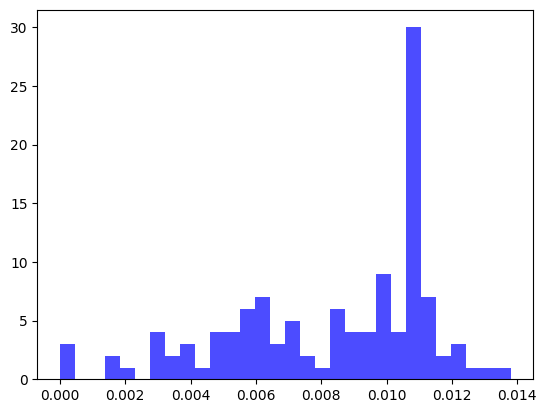

In [16]:
plt.hist(pca_weights, bins=30, color='blue', alpha=0.7)

Feature Importance Levels

In [17]:
pca_weights[pca_weights['median weights']>0.01]

,median weights
Minus_Directional_Movement,0.01380337
Plus_Directional_Movement,0.01324847
Average_True_Range,0.01253536
Index_of_lowest_value_over_period,0.01206635
Index_of_highest_value_over_period,0.01205371
Index_of_highest_value_over_a_specified_period,0.01204328
Standard_Deviation,0.01168782
SMA_200,0.01151107
MACD_EXT,0.01137172
MACD,0.01137172


A lot of them are highly correlated with each other. Let's try to reduce the number of features by using VIF.

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import add_constant

In [36]:
tech = technical_features.BuildFeatures(pca_tec.index[i])
tech.build_technical_features()
df = tech.technical_features
df = clean_technical_features(df)


Error: Moving_Average_Convergence/Divergence_Fix_12/26


In [37]:
df = add_constant(df)

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = df.columns
vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

/Users/jandh/Desktop/Old Desktop/od/2 Quarter/Flexible/Factor-Research/.venv/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/Users/jandh/Desktop/Old Desktop/od/2 Quarter/Flexible/Factor-Research/.venv/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/Users/jandh/Desktop/Old Desktop/od/2 Quarter/Flexible/Factor-Research/.venv/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


A lot of the import features are highly correlated

In [41]:
vif_data[vif_data["VIF"]<10]

,Feature,VIF
0,const,0.00000000
4,Chaikin_ADI_Oscillator,3.96736062
13,Beta,1.34659720
14,Balance_of_Power,6.30665209
16,Doji_Star,1.08315141
18,Engulfing_Pattern,1.27201137
19,Evening_Doji_Star,1.64575408
20,Evening_Star,1.69076101
21,Up_Down_gap_side_by_side_white_lines,1.04883425
22,Gravestone_Doji,1.24860186


In [58]:
tech = technical_features.BuildFeatures(pca_tec.index[i])
tech.build_technical_features()
df = tech.technical_features
df = clean_technical_features(df)

Error: Moving_Average_Convergence/Divergence_Fix_12/26


In [59]:
def select_features_vif_below_threshold(df, threshold=20):
    """
    Iteratively add features while ensuring VIF remains below the given threshold.
    
    """
    # List to store selected features
    selected_features = [df.columns[0]]  # Start with the first feature

    for feature in df.columns[1:]:
        temp_features = selected_features + [feature] # Temporary added feature list
        df_temp = add_constant(df[temp_features])  

        # Compute VIF for the new set of features
        vif_values = [variance_inflation_factor(df_temp.values, i) for i in range(df_temp.shape[1])]
        
        # Check if all features meet the VIF threshold
        if max(vif_values) < threshold:
            selected_features.append(feature)  # Keep the feature

    return selected_features  # Return DataFrame with selected features

In [67]:
selected_columns_20 = select_features_vif_below_threshold(df)
selected_columns_100 = select_features_vif_below_threshold(df,100)
selected_columns_500 = select_features_vif_below_threshold(df,500)
selected_columns_5000 = select_features_vif_below_threshold(df,5000)

/Users/jandh/Desktop/Old Desktop/od/2 Quarter/Flexible/Factor-Research/.venv/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/Users/jandh/Desktop/Old Desktop/od/2 Quarter/Flexible/Factor-Research/.venv/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/Users/jandh/Desktop/Old Desktop/od/2 Quarter/Flexible/Factor-Research/.venv/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/Users/jandh/Desktop/Old Desktop/od/2 Quarter/Flexible/Factor-Research/.venv/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Analysis of VIFs working mechanism, decided to go with 100 thereshold 

In [77]:
print(len(selected_columns_20))
print(len(selected_columns_100))
print(len(selected_columns_500))
print(len(selected_columns_5000))
print(set(selected_columns_100).symmetric_difference(set(selected_columns_500)))
print(set(selected_columns_100).difference(set(selected_columns_500)))
print(set(selected_columns_500).difference(set(selected_columns_100)))
print(set(selected_columns_100).symmetric_difference(set(selected_columns_5000)))

61
77
71
75
{'Percentage_Price_Oscillator', 'Minus_Directional_Movement', 'one_day_rate_of_change_of_a_triple_smooth_ema', 'Parabolic_SAR_Extended', 'Momentum', 'Ultimate_Oscillator', 'Williams_R', 'Average_Price', 'Parabolic_SAR', 'Index_of_lowest_value_over_period', 'Bollinger_Band_Upper', 'MACD_Histogram', 'MACD', 'Plus_Directional_Movement', 'Index_of_highest_value_over_a_specified_period', 'Variance'}
{'Variance', 'Percentage_Price_Oscillator', 'Williams_R', 'Minus_Directional_Movement', 'one_day_rate_of_change_of_a_triple_smooth_ema', 'Plus_Directional_Movement', 'Parabolic_SAR_Extended', 'Index_of_highest_value_over_a_specified_period', 'MACD_Histogram', 'Momentum', 'MACD'}
{'Ultimate_Oscillator', 'Average_Price', 'Bollinger_Band_Upper', 'Parabolic_SAR', 'Index_of_lowest_value_over_period'}
{'Percentage_Price_Oscillator', 'FAMA', 'Minus_Directional_Movement', 'Money_Flow_Index', 'Standard_Deviation', 'one_day_rate_of_change_of_a_triple_smooth_ema', 'Hilbert_Transform_Instantaneo

In [84]:
selected_columns_100

['SMA_50',
 'SMA_200',
 'Chaikin_ADI_Line',
 'Chaikin_ADI_Oscillator',
 'ADM_Index',
 'ADM_Index_Rating',
 'Absolute_Price_Oscillator',
 'Average_True_Range',
 'Beta',
 'Balance_of_Power',
 'Commodity_Channel_Index',
 'Doji_Star',
 'Dragonfly_Doji',
 'Engulfing_Pattern',
 'Evening_Doji_Star',
 'Evening_Star',
 'Up_Down_gap_side_by_side_white_lines',
 'Gravestone_Doji',
 'Hammer',
 'Hanging_Man',
 'Harami_Pattern',
 'Harami_Cross_Pattern',
 'High_Wave_Candle',
 'Hikkake_Pattern',
 'Modified_Hikkake_Pattern',
 'Homing_Pigeon',
 'Identical_Three_Crows',
 'In_Neck_Pattern',
 'Inverted_Hammer',
 'Kicking',
 'Kicking_by_Length',
 'Ladder_Bottom',
 'Long_Legged_Doji',
 'Long_Line_Candle',
 'Marubozu',
 'Matching_Low',
 'Mat_Hold',
 'Morning_Star',
 'On_Neck_Pattern',
 'Piercing_Pattern',
 'Rising_Falling_Three_Methods',
 'Separating_Lines',
 'Shooting_Star',
 'Short_Line_Candle',
 'Spinning_Top',
 'Stalled_Pattern',
 'Stick_Sandwich',
 'Tasuki_Gap',
 'Thrusting_Pattern',
 'Tristar_Pattern',
 

# PCA for technical factors with selected columns only

In [152]:
def getWeights_modified(df,selected_columns,threshold=0.9,is_test=False):
    # drop columns with more than 50% na values
    df = df.drop(columns = df.columns[df.isna().sum()>len(df)/2])

    # drop columns with object type
    df = df.drop(columns = df.select_dtypes(include=['object']).columns)

    # fill na values with previous values
    nacolumns = df.columns[df.isna().sum()>0]
    df[nacolumns]  = df[nacolumns].ffill()

    # drop rows with na values
    df.dropna(inplace=True)
    df = df[selected_columns]
    #pca weights
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df)
    pca = PCA()
    pca.fit(scaled_data)
    
    # total variance explained crossing threshold
    first_index_above_threshold = np.argmax(pca.explained_variance_ratio_.cumsum() > threshold)
    if is_test:
        plt.plot(pca.explained_variance_ratio_)
        print(first_index_above_threshold)
    
    loadings = abs(pca.components_)
    loadings = loadings/(loadings.sum(axis=1)[:, np.newaxis])
    fa = (loadings[:first_index_above_threshold] * pca.explained_variance_ratio_[:first_index_above_threshold][:, np.newaxis]).sum(axis=0)/sum(pca.explained_variance_ratio_[:first_index_above_threshold])
    return fa, df.columns

In [153]:
def cal_weights(tickers,selected_columns,total_explained_var = 0.9,is_test=False):
    
    pca_tec = pd.DataFrame(index = np.array(tickers))
    for i in range(len(pca_tec)):
        try:
            tech = technical_features.BuildFeatures(pca_tec.index[i])
            tech.build_technical_features()
            df = tech.technical_features
            weights,cols = getWeights_modified(df,selected_columns,total_explained_var,is_test)
            pca_tec.loc[pca_tec.index[i],cols] = weights
            print(pca_tec.index[i],'Success')
            
        except:
            print(f"Issue in {pca_tec.index[i]}")
            continue
    return pca_tec

Threshold Selection tests, threshold selcted use the change in curvature 

Error: Moving_Average_Convergence/Divergence_Fix_12/26
13
AAPL Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
14
MSFT Success


Chande_Momentum_Oscillator     0.02365215
Rate_of_Change_Percentage      0.02361532
Absolute_Price_Oscillator      0.02323909
Williams_R                     0.02292361
Percentage_Price_Oscillator    0.02275852
                                  ...    
Identical_Three_Crows          0.00208138
Rising_Falling_Three_Methods   0.00198488
Mat_Hold                       0.00126861
Kicking_by_Length              0.00000000
Kicking                        0.00000000
Length: 77, dtype: float64

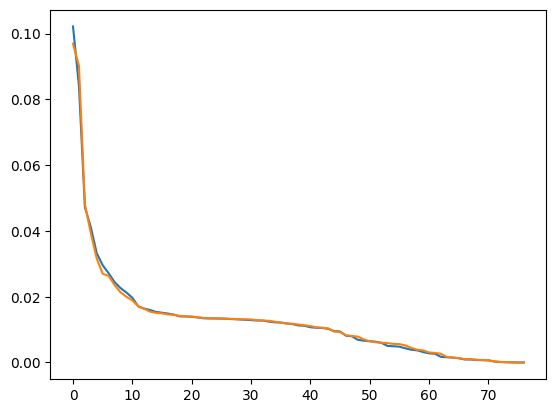

In [154]:
cal_weights(tickers,selected_columns_100,0.5,True).describe().median(axis=0).sort_values(ascending=False)

Error: Moving_Average_Convergence/Divergence_Fix_12/26
20
AAPL Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
21
MSFT Success


Absolute_Price_Oscillator             0.02014238
Rate_of_Change_Percentage             0.02011969
Williams_R                            0.02008638
Chande_Momentum_Oscillator            0.01995367
Hilbert_Transform_SineWave_leadsine   0.01969340
                                         ...    
Tristar_Pattern                       0.00475545
Identical_Three_Crows                 0.00405061
Mat_Hold                              0.00254461
Kicking                               0.00000000
Kicking_by_Length                     0.00000000
Length: 77, dtype: float64

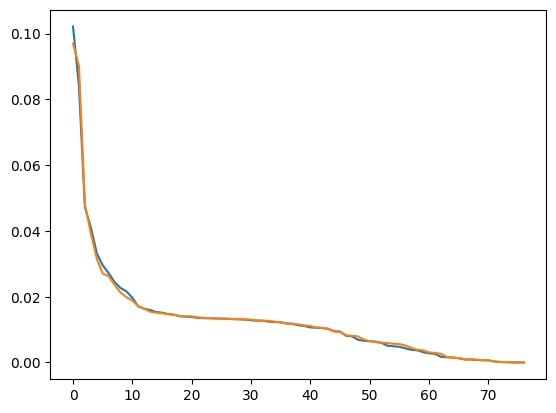

In [157]:
cal_weights(tickers,selected_columns_100,0.6,True).describe().median(axis=0).sort_values(ascending=False)

In [158]:
technical_features_final_weights = cal_weights(snp1500.index,selected_columns_100,0.5)

Error: Moving_Average_Convergence/Divergence_Fix_12/26
BKNG Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
MMM Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
AOS Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
ATEN Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
AAON Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
AIR Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
ABM Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
ACAD Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
ACIW Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
ADMA Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
ACM Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
AGCO Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
ALE Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
AMSF Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26

$BRK.B: possibly delisted; no timezone found


Error: Moving_Average_Convergence/Divergence_Fix_12/26
BHE Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
Issue in BRK.B
Error: Moving_Average_Convergence/Divergence_Fix_12/26
BHLB Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
BERY Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
BBY Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
BIO Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
TECH Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
BLFS Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
BMRN Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
BIIB Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
BKH Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
BL Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
BLK Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
BLKB Success
Error: Moving_Average_Convergence/Divergence_Fix_12/2

$BF.B: possibly delisted; no price data found  (1d 1926-03-10 -> 2025-02-13)


Error: Moving_Average_Convergence/Divergence_Fix_12/26
BRO Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
Issue in BF.B
Error: Moving_Average_Convergence/Divergence_Fix_12/26
BRKR Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
BC Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
BLDR Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
BG Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
BURL Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
CHRW Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
CACI Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
CBRE Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
CDW Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
CEVA Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
CF Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
CME Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
C

$CWEN.A: possibly delisted; no timezone found


Error: Moving_Average_Convergence/Divergence_Fix_12/26
CLH Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
YOU Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
Issue in CWEN.A
Error: Moving_Average_Convergence/Divergence_Fix_12/26
CWEN Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
CLF Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
CSGP Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
COKE Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
CCOI Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
CGNX Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
CTSH Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
CNS Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
COHR Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
COHU Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
CL Success
Error: Moving_Average_Convergence/Divergence_Fix_12

$MOG.A: possibly delisted; no timezone found


Error: Moving_Average_Convergence/Divergence_Fix_12/26
MCO Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
Issue in MOG.A
Error: Moving_Average_Convergence/Divergence_Fix_12/26
MS Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
MORN Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
MSI Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
COOP Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
MLI Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
MUR Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
MUSA Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
MYGN Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
NABL Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
NBTB Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
Issue in NATL
Error: Moving_Average_Convergence/Divergence_Fix_12/26
VYX Success
Error: Moving_Average_Convergence/Divergence_Fix_12/

Could not get exchangeTimezoneName for ticker 'SITC' reason: 'chart'
$SITC: possibly delisted; no timezone found


Error: Moving_Average_Convergence/Divergence_Fix_12/26
SEIC Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
Issue in SITC
Error: Moving_Average_Convergence/Divergence_Fix_12/26
SJW Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
SLG Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
SLM Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
SM Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
SPSC Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
SPXC Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
STAA Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
STAG Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
STE Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
SBRA Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
SABR Success
Error: Moving_Average_Convergence/Divergence_Fix_12/26
SAFE Success
Error: Moving_Average_Convergence/Divergence_Fix_12/2

In [160]:
final_pca_weights = pd.DataFrame(technical_features_final_weights.median(axis=0).sort_values(ascending=False),columns=['median weights'])

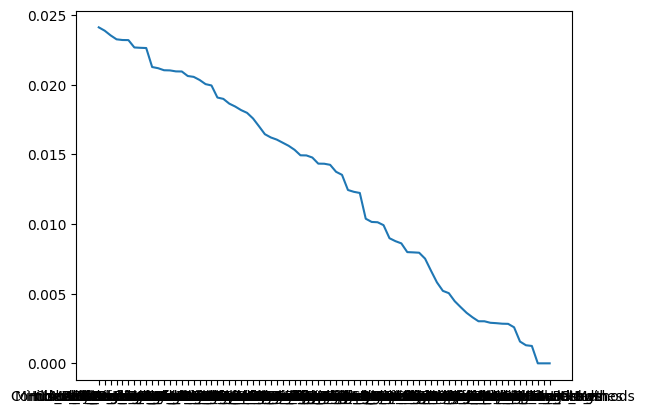

In [163]:
plt.plot(final_pca_weights)

In [172]:
final_pca_weights

,median weights
Williams_R,0.02411469
Commodity_Channel_Index,0.02387403
MACD_Histogram,0.02353706
Minus_Directional_Movement,0.02325455
Momentum,0.02320480
...,...
Identical_Three_Crows,0.00129857
Rising_Falling_Three_Methods,0.00124672
Kicking,0.00000000
Kicking_by_Length,0.00000000


In [167]:
final_pca_weights[final_pca_weights['median weights']>0.01]

,median weights
Williams_R,0.02411469
Commodity_Channel_Index,0.02387403
MACD_Histogram,0.02353706
Minus_Directional_Movement,0.02325455
Momentum,0.02320480
Linear_Regression_Angle,0.02319852
Absolute_Price_Oscillator,0.02267082
Chande_Momentum_Oscillator,0.02264578
MACD,0.02262975
Standard_Deviation,0.02126633
